# 정확도를 향상시킨 모델
참조: https://hdevstudy.tistory.com/116

In [1]:
# 필요한 라이브러리 로딩
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
from keras.datasets import cifar10

# 데이터 로딩
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# 데이터 형태 확인
print(x_train.shape, y_train.shape) # (50000, 32, 32, 3) (50000, 1)
print(x_test.shape, y_test.shape) # (10000, 32, 32, 3) (10000, 1)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
# 라벨이름 저장
label_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

테스트 이미지 시각화


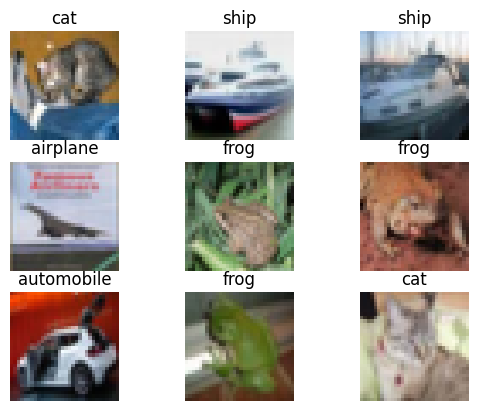

In [7]:
# 테스트 데이터 이미지 시각화
print('테스트 이미지 시각화')
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.title(label_names[y_test[i][0]])
    plt.axis('off')
plt.show()

In [8]:
# 데이터 전처리
from keras.utils import to_categorical

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# 2 VGG BLOCKS + DROPOUT 모델 생성
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

def vgg_model_4(input_shape):
    model4 = Sequential()

    # Convolutional Block (Conv-Conv-Pool-Dropout)
    model4.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model4.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model4.add(MaxPooling2D(pool_size=(2, 2)))
    model4.add(Dropout(0.25))

    # Convolutional Block (Conv-Conv-Pool-Dropout)
    model4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model4.add(MaxPooling2D(pool_size=(2, 2)))
    model4.add(Dropout(0.25))

    # Classifying
    model4.add(Flatten())
    model4.add(Dense(512, activation='relu'))
    model4.add(Dropout(0.5))
    model4.add(Dense(10, activation='softmax'))

    return model4

In [10]:
# 모델 요약
vgg4 = vgg_model_4((32,32,3))
print('VGG4 모델 요약')
print(vgg4.summary())

VGG4 모델 요약
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                             

In [11]:
# 모델 컴파일
from keras.optimizers import Adam

vgg4.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델 체크포인트 설정
checkpoint = ModelCheckpoint('vgg4_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# 조기 종료 설정
earlystopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

In [17]:
# 모델 훈련
history = vgg4.fit(x_train, y_train, batch_size=128, epochs=40, validation_data=(x_test, y_test), callbacks=[checkpoint, earlystopping])

Epoch 1/40
391/391 [==============================] - ETA: 0s - loss: 1.0250 - accuracy: 0.6377
Epoch 1: val_accuracy improved from -inf to 0.67520, saving model to vgg4_model.h5
391/391 [==============================] - 59s 151ms/step - loss: 1.0250 - accuracy: 0.6377 - val_loss: 0.9114 - val_accuracy: 0.6752
Epoch 2/40


c:\Users\USER\anaconda3\envs\tf_django_venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


391/391 [==============================] - ETA: 0s - loss: 0.9228 - accuracy: 0.6742
Epoch 2: val_accuracy improved from 0.67520 to 0.69750, saving model to vgg4_model.h5
391/391 [==============================] - 63s 162ms/step - loss: 0.9228 - accuracy: 0.6742 - val_loss: 0.8564 - val_accuracy: 0.6975
Epoch 3/40
391/391 [==============================] - ETA: 0s - loss: 0.8362 - accuracy: 0.7055
Epoch 3: val_accuracy improved from 0.69750 to 0.73240, saving model to vgg4_model.h5
391/391 [==============================] - 65s 165ms/step - loss: 0.8362 - accuracy: 0.7055 - val_loss: 0.7596 - val_accuracy: 0.7324
Epoch 4/40
391/391 [==============================] - ETA: 0s - loss: 0.7732 - accuracy: 0.7293
Epoch 4: val_accuracy improved from 0.73240 to 0.73830, saving model to vgg4_model.h5
391/391 [==============================] - 66s 168ms/step - loss: 0.7732 - accuracy: 0.7293 - val_loss: 0.7431 - val_accuracy: 0.7383
Epoch 5/40
391/391 [==============================] - ETA: 0s -

In [ ]:
# 모델 평가
scores4 = vgg4.evaluate(x_test, y_test)
print('VGG4 Accuracy: %.3f' % scores4[1])
print('VGG4 Loss: %.3f' % scores4[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8080 - loss: 0.7182
VGG4 Accuracy: 0.803
VGG4 Loss: 0.718


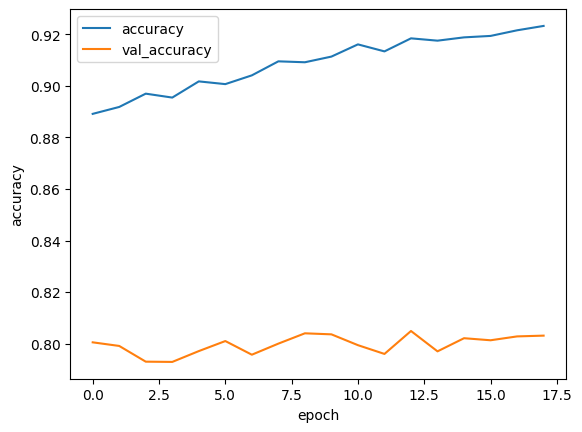

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

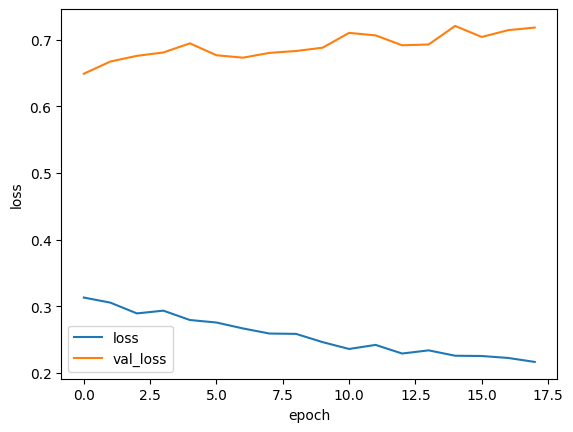

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
# 예측
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array

# 이미지 로드 및 전처리
test_image = image.load_img('/content/plane_256x256.jpg', target_size=(32,32))
test_image = img_to_array(test_image)/255.0
test_image = np.expand_dims(test_image, axis=0)

In [ ]:
# 예측
pred = vgg4.predict(test_image)
print(pred)

# 확률이 가장 높은 숫자 반환
pred_num = np.argmax(pred, axis=1)[0]
pred_num

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[1.0000000e+00 9.8870157e-10 8.6495108e-12 3.1090104e-14 2.6728114e-16
  3.9952510e-20 1.5272324e-13 1.6916310e-20 2.4991113e-08 6.5803266e-12]]


0

In [ ]:
label_names[pred_num]

'airplane'

In [ ]:
pred[0][pred_num]

1.0